Advanced: mask_phases and mask_enabled
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.4 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
#!pip install -I "phoebe>=2.4,<2.5"

Let's get started with some basic imports.

In [2]:
import phoebe
from phoebe import u # units
import numpy as np

b = phoebe.default_binary()

And then we'll build a synthetic "dataset" and initialize a new bundle with those data

In [3]:
b = phoebe.default_binary()
b.add_dataset('lc', times=phoebe.linspace(0,5,1001))
b.run_compute()

times = b.get_value('times@model')
fluxes = b.get_value('fluxes@model')
sigmas = np.ones_like(times) * 0.01

b = phoebe.default_binary()
b.add_dataset('lc', compute_phases=phoebe.linspace(0,1,101),
              times=times, fluxes=fluxes, sigmas=sigmas,
              dataset='lc01')

100%|██████████| 1001/1001 [00:12<00:00, 80.19it/s]


<ParameterSet: 78 parameters | contexts: figure, constraint, dataset, compute>

mask_enabled and mask_phases parameters
----------------------------

Each dataset will have a `mask_enabled` parameter and, if `mask_enabled=True`, a `mask_phases` parameter.

In [4]:
b.get_parameter(qualifier='mask_enabled', dataset='lc01', context='dataset')

<Parameter: mask_enabled=True | keys: description, value, visible_if, copy_for, readonly, advanced, latexfmt>

In [5]:
print(b.get_parameter(qualifier='mask_enabled', dataset='lc01', context='dataset').description)

Whether to apply the mask in mask_phases during plotting, calculate_residuals, calculate_chi2, calculate_lnlikelihood, and run_solver


This is `True` by default, but `mask_phases` is set to an empty list, meaning that no masking will actually be applied.  This `mask_enabled` parameter just allows for setting a mask via `mask_phases` and then toggling that mask on and off without having to reset `mask_phases`.

In [6]:
b.get_parameter(qualifier='mask_phases', dataset='lc01', context='dataset')

<Parameter: mask_phases=[] | keys: description, value, default_unit, visible_if, required_shape, copy_for, readonly, advanced, latexfmt>

In [7]:
print(b.get_parameter(qualifier='mask_phases', dataset='lc01', context='dataset').description)

List of phase-tuples.  Any observations inside the range set by any of the tuples will be included.


We can now plot the observations to see the unmasked (fake) data.

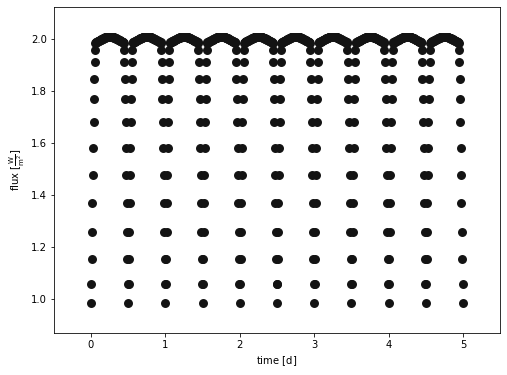

In [8]:
_ = b.plot(show=True)

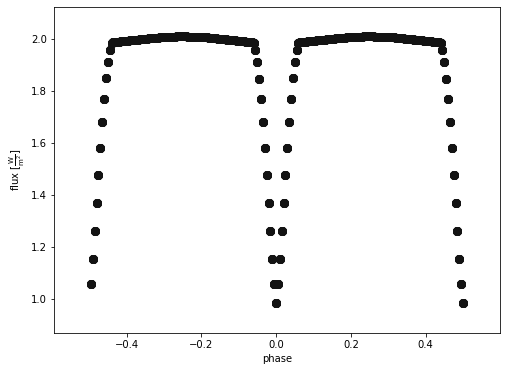

In [9]:
_ = b.plot(x='phases', show=True)

If we wanted to only include the eclipses, we could set `mask_phases` as a list of tuples, where each tuple contains the phase range that we want to **keep**.

In [10]:
b.set_value('mask_phases', [(-0.1, 0.1), (0.4,-0.4)])

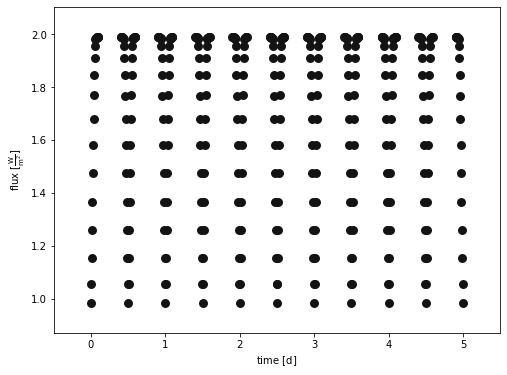

In [11]:
_ = b.plot(show=True)

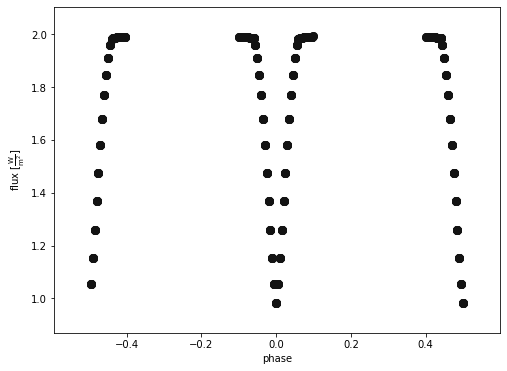

In [12]:
_ = b.plot(x='phases', show=True)

Note that [b.run_compute](../api/phoebe.frontend.bundle.Bundle.run_compute.md), computes the forward model ignoring that mask, whether `compute_phases` is set or not.

In [13]:
b.run_compute()

100%|██████████| 101/101 [00:01<00:00, 79.80it/s]


<ParameterSet: 3 parameters | qualifiers: times, fluxes, comments>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


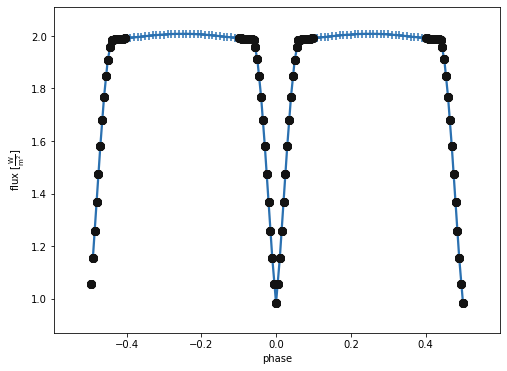

In [14]:
_ = b.plot(x='phases', show=True, marker={'model': '+'})

In [15]:
b.set_value('compute_phases', [])
b.run_compute()

100%|██████████| 1001/1001 [00:13<00:00, 74.87it/s]


<ParameterSet: 3 parameters | qualifiers: times, fluxes, comments>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


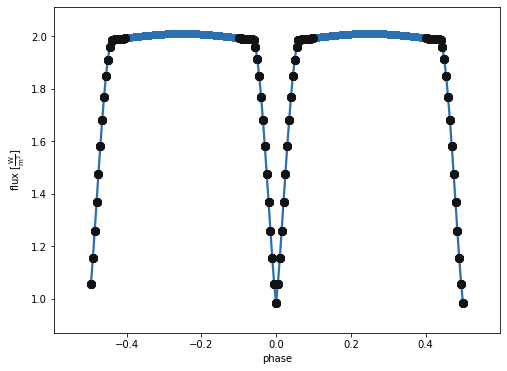

In [16]:
_ = b.plot(x='phases', show=True, marker={'model': '+'})

However, when calling [b.run_solver](../api/phoebe.frontend.bundle.Bundle.run_solver.md), the mask will be applied when determining what times to compute the forward-model (see [Advanced: Solver Times](./solver_times.ipynb)) and within the cost-function (see [calculate_residuals](api/phoebe.parameters.ParameterSet.calculate_residuals.md),  [calculate_chi2](api/phoebe.parameters.ParameterSet.calculate_chi2.md), and [calculate_lnlikelihood](api/phoebe.parameters.ParameterSet.calculate_lnlikelihood.md)).

## Phasing Options

Like the constraint between [compute times and phases](compute_times_phases.ipynb), phase-masking adheres to the per-dataset `phases_t0` parameter to set which of the [various t0s](t0s.ipynb) to use when mapping between time and phase.

And in the case of time-dependent systems, these will also adhere to `phases_dpdt` (in the case of [dpdt](dpdt.ipynb) and/or `phases_period` (in the case of [apsidal motion (dperdt)](apsidal_motion.ipynb).

In [18]:
print(b.get_parameter('phases_t0').description)

t0 to use when converting between compute_times and compute_phases as well as when applying mask_phases


In [19]:
print(b.get_parameter('phases_t0').choices)

['t0_supconj', 't0_perpass', 't0_ref']


## See Also

The following other advanced tutorials may interest you:
* [Advanced: Compute Times & Phases](./compute_times_phases.ipynb)
* [Advanced: Solver Times](./solver_times.ipynb)